#Dataset
The Harvard USPTO Patent Dataset (HUPD) is a large collection of patent applications filed with the United States Patent and Trademark Office (USPTO) from January 2004 to December 2018. It contains over 4.5 million documents, making it one of the largest patent datasets available. Unlike other datasets, HUPD includes early versions of patent applications submitted by inventors, not just final granted patents. This makes it valuable for studying patentability using natural language processing (NLP) methods. The dataset also includes detailed metadata alongside text, enabling diverse NLP tasks like classification, language modeling, and summarization.

## Loading the Dataset Using Hugging Face's Datasets and Transformers Libraries

In [ ]:
!pip install datasets
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Let's use the load_dataset function to load all the patent applications that were filed to the USPTO in January 2016. We specify the date ranges of the training and validation sets as January 1-21, 2016 and January 22-31, 2016, respectively.**

In [ ]:
# Load the dataset
dataset_dict = load_dataset('HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather",
    icpr_label=None,
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
)

print('Loading is done!')

Loading is done!


#Let's display some information about the training and validation sets.

In [ ]:
# Dataset info
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 16153
    })
    validation: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 9094
    })
})


We can also display the fields within the dataset dictionary, as well as the sizes of the training and validation sets.

In [ ]:
# Print dataset dictionary contents and cache directory
print('Dataset dictionary contents:')
pprint(dataset_dict)
print('Dataset dictionary cached to:')
pprint(dataset_dict.cache_files)

Dataset dictionary contents:
DatasetDict({
    train: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 16153
    })
    validation: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 9094
    })
})
Dataset dictionary cached to:
{'train': [{'filename': '/root/.cache/huggingface/datasets/HUPD___hupd/sample-dcd4f2a65c57c4dc/0.0.0/6920d2def8fd7767046c0470603357f76866e5a09c97e19571896bfdca521142/hupd-train-00000-of-00003.arrow'},
           {'filename': '/root/.cache/huggingface/datasets/HUPD___hupd/sample-dcd4f2a65c57c4dc/0.0.0/6920d2def8fd7767046c0470603357f76866e5a09c97e19571896bfdca521142/hupd-train-00001-of

In [ ]:
# Print info about the sizes of the train and validation sets
print(f'Train dataset size: {dataset_dict["train"].shape}')
print(f'Validation dataset size: {dataset_dict["validation"].shape}')

Train dataset size: (16153, 14)
Validation dataset size: (9094, 14)


The rows in the dataset represent individual entries with 14 features/columns, likely related to patent filings given the context of the HUPD (Harvard USPTO Patent Dataset). The specific columns/features could include metadata about patent filings such as filing dates, titles, abstracts, inventors, assignees, etc.

#Loading the Data Frame

First thing first: Let's use pd.read_feather to load the bibliographic metadata.

#explore metadata

In [ ]:
# Specify the metadata path
# (You can alternatively provide the local metadata path)
_METADATA_PATH = "https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather"
# Read the feather
df = pd.read_feather(_METADATA_PATH)

We can see how the dataframe looks like.

In [ ]:
# Display the pandas dataframe
df

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
0,10018320,2004-06-29,Utility,"MITCHELL, LAURA MCGILLEM",1636,435,007400,1633.0,01-1637,Abandoned -- Failure to Respond to an Office A...,...,2005-06-01,2005-06-16,,,,,True,0,REJECTED,REJECTED
1,10018639,2004-03-15,Utility,"FOX, JOHN C",3753,137,884000,5181.0,442-134 PCT/US,Abandoned -- Failure to Respond to an Office A...,...,2005-04-06,2005-04-21,,,,,True,0,REJECTED,REJECTED
2,10048553,2004-10-18,Utility,"SAUCIER, SANDRA E",1651,435,280000,4574.0,21581/0286,Patent Expired Due to NonPayment of Maintenanc...,...,2005-03-31,2005-04-14,,,,,True,0,ACCEPTED,ACCEPTED
3,10048576,2005-03-28,Utility,"FRANCIS, FAYE",3725,241,001000,7991.0,020065,Patent Expired Due to NonPayment of Maintenanc...,...,2005-10-19,2005-11-03,,,,,False,0,ACCEPTED,ACCEPTED
4,10049016,2004-06-08,Utility,"LE, MICHAEL",2163,707,100000,5734.0,3113.2.1.1,Patented Case,...,2005-03-03,2005-03-17,,,,,False,0,ACCEPTED,ACCEPTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518249,16062170,2018-06-14,Utility,"JOHNSON, STEPHEN",3641,102,202120,5068.0,8952-000475-US-NP,Patented Case,...,2018-09-26,2018-10-11,F42B3127,"F42B3127, B60R202126029, F42B3198",F42B312,"F42B312, F42B3198",True,0,ACCEPTED,ACCEPTED
4518250,16062262,2018-06-14,Utility,"LACHICA, ERICSON M",1792,426,115000,8265.0,7066-X18-099,Abandoned -- Failure to Respond to an Office A...,...,2018-09-26,2018-10-11,B65D858043,"B65D858043, A47J313628",B65D85804,"B65D85804, A47J3136",True,0,PENDING,REJECTED
4518251,16062675,2018-06-15,Utility,"VERLEY, NICOLE T",3618,280,730200,9465.0,8952-000477-US-NP,Patented Case,...,2018-09-26,2018-10-11,B60R2123138,"B60R2123138, B60R20210048, B60R21207",B60R21231,"B60R21231, B60R21207",True,0,ACCEPTED,ACCEPTED
4518252,16062981,2018-06-15,Utility,"JAVANMARD, SAHAR",1627,514,560000,2734.0,SCIAD-34717.252,Docketed New Case - Ready for Examination,...,2018-09-26,2018-10-11,A61K31202,"A61K31202, A61K31201, A61K4506, A61K230000, A6...",A61K31202,"A61K31202, A61K31201, A61P2900",False,0,ACCEPTED,PENDING


We can also display all the data fields within the dataframe.

In [ ]:
# Let's look at the columns of the dataframe
df.columns

Index(['application_number', 'filing_date', 'application_invention_type',
       'examiner_full_name', 'examiner_art_unit', 'uspc_class',
       'uspc_subclass', 'confirm_number', 'atty_docket_number',
       'appl_status_desc', 'appl_status_date', 'file_location',
       'file_location_date', 'earliest_pgpub_number', 'earliest_pgpub_date',
       'wipo_pub_number', 'wipo_pub_date', 'patent_number',
       'patent_issue_date', 'invention_title', 'small_entity_indicator',
       'aia_first_to_file', 'publication_number', 'date_application_produced',
       'date_application_published', 'main_cpc_label', 'cpc_labels',
       'main_ipcr_label', 'ipcr_labels', 'foreign', 'continuation', 'decision',
       'decision_as_of_2020'],
      dtype='object')

We can try to display all the patent applications that were filed to the USPTO in the year 2016.

In [ ]:
# Display all the USPTO patent applications that were filed in 2016 according to our metadata
df[df.filing_date.astype(str).str.startswith('2016')]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
2182921,13144833,2016-01-22,Utility,"FUBARA, BLESSING M",1613,424,059000,9423.0,096115-0897066 (002510US),Abandoned -- Failure to Respond to an Office A...,...,2016-06-15,2016-06-30,A61K3334,"A61K3334, A61K314164, A61K818, A61K827, A61K86...",A61K3334,"A61K3334, A61K818, A61K827, A61K867, A61Q1704,...",False,0,REJECTED,REJECTED
2285082,13261748,2016-01-20,Utility,"LEUNG, WAI LUN",2637,398,045000,5040.0,169273,Patented Case,...,2016-05-11,2016-05-26,H04Q110071,"H04Q110071, H04Q110067, H04L6918",H04Q1100,"H04Q1100, H04L2906",True,0,ACCEPTED,ACCEPTED
2393866,13383015,2016-02-01,Utility,"MICHENER, JOSHUA J",3635,052,282100,5412.0,0401-015,Patented Case,...,2016-04-27,2016-05-12,E04B14114,"E04B14114, E04B124, E04B5023, E04B20012484",E04B141,"E04B141, E04B502, E04B124",False,0,ACCEPTED,ACCEPTED
2507870,13510522,2016-02-03,Utility,"CHIN, HUI H",1762,524,318000,9378.0,20162.54USWO,Patented Case,...,2012-11-07,2012-11-22,,,C08F214,"C08F214, B32B516, C08F2006, C08K51545, C08K511",True,0,ACCEPTED,ACCEPTED
2567818,13577188,2016-02-19,Utility,"TRISCHLER, JOHN T",2859,320,119000,6303.0,3C101-050US1,Patented Case,...,2013-02-06,2013-02-21,,,H02J700,H02J700,True,0,ACCEPTED,ACCEPTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297507,15530689,2016-03-31,Utility,"OLSHANNIKOV, ALEX",2142,715,763000,5508.0,JAMD1147919(P016),Abandoned -- Failure to Respond to an Office A...,...,2018-05-23,2018-06-07,G06F30482,"G06F30482, H04N214312, G06F30484",G06F30482,"G06F30482, G06F30484",False,0,ACCEPTED,REJECTED
4297508,15530690,2016-12-09,Utility,"WONG, YUEN H",3667,701,036000,8430.0,106389-4216,Patented Case,...,2018-05-30,2018-06-14,B60H100778,"B60H100778, B60H100771, B60H100371, G05B1502",B60H100,"B60H100, G05B1502",False,0,PENDING,ACCEPTED
4297510,15530698,2016-04-15,Utility,"YAARY, ERIC",1747,131,352000,5411.0,SWEDM.055AUS2,Abandoned -- Failure to Respond to an Office A...,...,2018-05-09,2018-05-24,A24F2302,"A24F2302, B65B910",A24F2302,A24F2302,True,0,REJECTED,REJECTED
4297518,15530795,2016-05-02,Utility,"PENG, CHARLIE YU",3649,116,02800R,3114.0,None,Abandoned -- Failure to Respond to an Office A...,...,2017-11-08,2017-11-23,B60Q7005,"B60Q7005, B60Q702",B60Q700,"B60Q700, B60Q702",False,0,REJECTED,REJECTED


#Pre-Processing Steps

establish the label-to-index mapping for the decision status field by assigning the decision status labels to the class indices as this step is required to convert decision status labels into numeric indices, which is necessary for training the model.

In [ ]:
# Label-to-index mapping for the decision status field
decision_to_str = {'REJECTED': 0, 'ACCEPTED': 1, 'PENDING': 2, 'CONT-REJECTED': 3, 'CONT-ACCEPTED': 4, 'CONT-PENDING': 5}

# Helper function
def map_decision_to_string(example):
    return {'decision': decision_to_str[example['decision']]}

We converted the decision status labels in the training and validation sets to their corresponding numeric indices

In [ ]:
# Re-labeling/mapping.
train_set = dataset_dict['train'].map(map_decision_to_string)
val_set = dataset_dict['validation'].map(map_decision_to_string)

Map:   0%|          | 0/16153 [00:00<?, ? examples/s]

Map:   0%|          | 0/9094 [00:00<?, ? examples/s]

In [ ]:
# Display the cached directories of the processed train and validation sets
print('Processed train and validation sets are cached to: ')
pprint(train_set.cache_files)
pprint(val_set.cache_files)

Processed train and validation sets are cached to: 
[{'filename': '/root/.cache/huggingface/datasets/HUPD___hupd/sample-2b8e0d69783ebf04/0.0.0/6920d2def8fd7767046c0470603357f76866e5a09c97e19571896bfdca521142/cache-4b2665e992434e94.arrow'}]
[{'filename': '/root/.cache/huggingface/datasets/HUPD___hupd/sample-2b8e0d69783ebf04/0.0.0/6920d2def8fd7767046c0470603357f76866e5a09c97e19571896bfdca521142/cache-2c37147ebe913ffc.arrow'}]


#Focus on Abstract and Claims Section:
We specified that we'll focus on the abstract and claims section of the patent applications.


In [ ]:
_SECTION_ = 'abstract'
_SECTION_CLAIMS = 'claims'

# Helper function to concatenate text
def concatenate_sections(example):
    return {
        'text': ' '.join(example[_SECTION_ABSTRACT]) + ' ' + ' '.join(example[_SECTION_CLAIMS])
    }
# Concatenate abstract and claims sections
train_set = train_set.map(concatenate_sections)
val_set = val_set.map(concatenate_sections)


#Tokenize the Text:
We tokenized the abstract and claims text of each example in the training and validation sets using a tokenizer. The text is truncated to a maximum length and padded to ensure uniform length across all examples.

In [ ]:
# Tokenize the text
train_set = train_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

val_set = val_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

Map:   0%|          | 0/16153 [00:00<?, ? examples/s]

Map:   0%|          | 0/9094 [00:00<?, ? examples/s]

#Set the Format:
We set the format of the datasets to PyTorch tensors, specifying the columns to include: input_ids, attention_mask, and decision.

In [ ]:
# Rename decision to labels
train_set = train_set.rename_column("decision", "labels")
val_set = val_set.rename_column("decision", "labels")

# Set format for PyTorch
train_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

#Create DataLoaders:
We created DataLoader objects for the training and validation sets, setting the batch size to 16.


In [ ]:
# DataLoaders
train_dataloader = DataLoader(train_set, batch_size=32)
val_dataloader = DataLoader(val_set, batch_size=32)

#Inspect a Batch:
We retrieved the next batch from the training DataLoader and printed the input_ids and decision labels to inspect them. We also printed the shapes of the input and output tensors.

In [ ]:
batch = next(iter(train_dataloader))
pprint(batch['input_ids'])
pprint(batch['decision'])
input_shape = batch['input_ids'].shape
output_shape = batch['decision'].shape
print(f'Input shape: {input_shape}')
print(f'Output shape: {output_shape}')


tensor([[  101,  1996,  2556,  ...,     0,     0,     0],
        [  101,  7861,  5092,  ...,     0,     0,     0],
        [  101,  1037, 12109,  ...,     0,     0,     0],
        ...,
        [  101,  1037,  3259,  ...,     0,     0,     0],
        [  101,  1996,  2556,  ...,     0,     0,     0],
        [  101,  1996, 21362,  ...,     0,     0,     0]])
tensor([1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1])
Input shape: torch.Size([16, 512])
Output shape: torch.Size([16])


#examine the contents of the abstract and claims sections

In [ ]:
from datasets import load_dataset
from pprint import pprint

# Load the dataset
dataset_dict = load_dataset('HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather",
    icpr_label=None,
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
)

# Print the dataset structure to understand its features
print(dataset_dict['train'].features)

# Take a look at the abstract and claims sections for a few examples
sample_data = dataset_dict['train'].select(range(5))  # Get the first 5 samples from the training set

for i, example in enumerate(sample_data):
    print(f"Sample {i+1}:")
    print("Abstract:")
    pprint(example['abstract'])
    print("\nClaims:")
    pprint(example['claims'])
    print("\n" + "-"*50 + "\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for HUPD/hupd contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/HUPD/hupd.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
Loading dataset with config: PatentsConfig(name='sample', version=0.0.0, data_dir='sample', data_files={'train': ['hf://datasets/HUPD/hupd@main/hupd_metadata_2022-02-22.feather']}, description='Patent data from January 2016, for debugging')


Using metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710


Reading metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710
Filtering train dataset by filing start date: 2016-01-01
Filtering train dataset by filing end date: 2016-01-21
Filtering val dataset by filing start date: 2016-01-22
Filtering val dataset by filing end date: 2016-01-31


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

{'patent_number': Value(dtype='string', id=None), 'decision': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'abstract': Value(dtype='string', id=None), 'claims': Value(dtype='string', id=None), 'background': Value(dtype='string', id=None), 'summary': Value(dtype='string', id=None), 'description': Value(dtype='string', id=None), 'cpc_label': Value(dtype='string', id=None), 'ipc_label': Value(dtype='string', id=None), 'filing_date': Value(dtype='string', id=None), 'patent_issue_date': Value(dtype='string', id=None), 'date_published': Value(dtype='string', id=None), 'examiner_id': Value(dtype='string', id=None)}
Sample 1:
Abstract:
('The present invention relates to passive optical network (PON), and in '
 'particular, to an optical network terminal (ONT) in the PON system. In one '
 'embodiment, the optical network terminal includes a first interface coupled '
 'to a communications network, a second interface coupled to a network client '
 'and a processor incl

In [ ]:
import requests
import pyarrow.feather as feather
import pandas as pd
from datasets import Dataset
from pprint import pprint

# URL to the Feather file
url = "https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather"

# Download the file
response = requests.get(url)
feather_file_path = "hupd_metadata_2022-02-22.feather"

# Save the file locally
with open(feather_file_path, "wb") as f:
    f.write(response.content)

# Read the Feather file
df = feather.read_feather(feather_file_path)

# Convert the pandas DataFrame to a Hugging Face dataset
dataset = Dataset.from_pandas(df)

# Display the first few rows of the DataFrame
print(df.head())

# Check the dataset and its structure
pprint(df.columns)


  application_number filing_date application_invention_type  \
0           10018320  2004-06-29                    Utility   
1           10018639  2004-03-15                    Utility   
2           10048553  2004-10-18                    Utility   
3           10048576  2005-03-28                    Utility   
4           10049016  2004-06-08                    Utility   

         examiner_full_name examiner_art_unit uspc_class uspc_subclass  \
0  MITCHELL, LAURA MCGILLEM              1636        435        007400   
1               FOX, JOHN C              3753        137        884000   
2         SAUCIER, SANDRA E              1651        435        280000   
3             FRANCIS, FAYE              3725        241        001000   
4               LE, MICHAEL              2163        707        100000   

   confirm_number atty_docket_number  \
0          1633.0            01-1637   
1          5181.0     442-134 PCT/US   
2          4574.0         21581/0286   
3          7991.

#This model needs to be corrected as there is class imbalance

#Fine-tune the model:

In [ ]:
!pip install datasets transformers
!pip install datasets transformers[torch] accelerate
!pip install datasets transformers evaluate
!pip install --upgrade accelerate
!pip install pyarrow

#a complete pipeline for fine-tuning a DistilBERT model on a subset of patent applications,

**include both the abstract and claims sections of the patent applications for training**

In [ ]:
# Import necessary libraries
from pprint import pprint
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import DataLoader
import numpy as np
import evaluate

# Load the dataset
dataset_dict = load_dataset('HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather",
    icpr_label=None,
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
)

# Print to check dataset structure
print("Train set columns:", dataset_dict['train'].column_names)
print("Validation set columns:", dataset_dict['validation'].column_names)

# Label-to-index mapping
decision_to_str = {
    'REJECTED': 0,
    'ACCEPTED': 1,
    'PENDING': 2,
    'CONT-REJECTED': 3,
    'CONT-ACCEPTED': 4,
    'CONT-PENDING': 5
}

# Mapping Function for Labels
def map_decision_to_string(example):
    example['decision'] = decision_to_str[example['decision']]
    return example

# Re-labeling/mapping
train_set = dataset_dict['train'].map(map_decision_to_string)
val_set = dataset_dict['validation'].map(map_decision_to_string)

# Tokenizer setup
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
_SECTION_ABSTRACT = 'abstract'
_SECTION_CLAIMS = 'claims'

# Check if abstract and claims exist in the dataset
print("Abstract and Claims in Train Set:")
print(train_set[0][_SECTION_ABSTRACT])
print(train_set[0][_SECTION_CLAIMS])

# Helper function to concatenate text
def concatenate_sections(example):
    return {
        'text': ' '.join(example[_SECTION_ABSTRACT]) + ' ' + ' '.join(example[_SECTION_CLAIMS])
    }

# Concatenate abstract and claims sections
train_set = train_set.map(concatenate_sections)
val_set = val_set.map(concatenate_sections)

# Tokenize the text
train_set = train_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

val_set = val_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

# Rename decision to labels
train_set = train_set.rename_column("decision", "labels")
val_set = val_set.rename_column("decision", "labels")

# Set format for PyTorch
train_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# DataLoaders
train_dataloader = DataLoader(train_set, batch_size=16)
val_dataloader = DataLoader(val_set, batch_size=16)

# Model setup
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)

# Training arguments
training_args = TrainingArguments(
    output_dir="./both_results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.001,
    num_train_epochs=3,
)

# Define compute metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_set,
    eval_dataset=val_set,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Save the model
trainer.save_model("/content/new_model/fine_tuned_model")
tokenizer.save_pretrained("/content/new_model/fine_tuned_model")


Loading dataset with config: PatentsConfig(name='sample', version=0.0.0, data_dir='sample', data_files={'train': ['hf://datasets/HUPD/hupd@main/hupd_metadata_2022-02-22.feather']}, description='Patent data from January 2016, for debugging')


Using metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710


Reading metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710
Filtering train dataset by filing start date: 2016-01-01
Filtering train dataset by filing end date: 2016-01-21
Filtering val dataset by filing start date: 2016-01-22
Filtering val dataset by filing end date: 2016-01-31


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Train set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']
Validation set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']


Map:   0%|          | 0/16153 [00:00<?, ? examples/s]

Map:   0%|          | 0/9094 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Abstract and Claims in Train Set:
The present invention relates to passive optical network (PON), and in particular, to an optical network terminal (ONT) in the PON system. In one embodiment, the optical network terminal includes a first interface coupled to a communications network, a second interface coupled to a network client and a processor including a memory coupled to the first interface and to the second interface, wherein the processor is capable of converting optical signals to electric signals, such that the network client can access the communications network.
1. A compact optical network terminal, comprising: a first interface coupled to a communications network; a second interface coupled to a network client, wherein the second interface is a network connectivity dongle with an optical transceiver at one end; and a processor including a circuitry and a memory coupled to the first interface and to the second interface, wherein the processor is capable of converting optical

Map:   0%|          | 0/16153 [00:00<?, ? examples/s]

Map:   0%|          | 0/9094 [00:00<?, ? examples/s]

Map:   0%|          | 0/16153 [00:00<?, ? examples/s]

Map:   0%|          | 0/9094 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.974200,0.964705,0.428084
2,0.974700,0.965659,0.465802
3,0.969700,0.962252,0.462503


('/content/new_model/fine_tuned_model/tokenizer_config.json',
 '/content/new_model/fine_tuned_model/special_tokens_map.json',
 '/content/new_model/fine_tuned_model/vocab.txt',
 '/content/new_model/fine_tuned_model/added_tokens.json',
 '/content/new_model/fine_tuned_model/tokenizer.json')

**Result Interpretation**
Despite the efforts to train the model, the results indicate persistent issues with overfitting and class imbalance, as evidenced by the minimal improvement in validation loss and accuracy over the epochs. The training loss remains nearly constant, while the validation loss does not show significant improvement, suggesting that the model struggles to generalize beyond the training data. The relatively low and stagnant accuracy further highlights the need for more advanced techniques, such as oversampling, learning rate scheduling, early stopping, and addressing class imbalances, which were not adequately implemented in this training process. These shortcomings prevent the model from achieving better performance and robust generalization. Additionally, when I deployed the patent app on Hugging Face Spaces, I noticed that for all patent IDs, the patentability score consistently showed as PENDING, indicating a potential flaw in the prediction mechanism.

#Explore the train and validation data

In [ ]:
# Load the dataset
dataset_dict = load_dataset(
    'HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather",
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
    trust_remote_code=True
)

# Convert to DataFrame
train_df = pd.DataFrame(dataset_dict['train'])
val_df = pd.DataFrame(dataset_dict['validation'])

# Print columns to verify availability
print("Train set columns:", train_df.columns.tolist())
print("Validation set columns:", val_df.columns.tolist())

Loading dataset with config: PatentsConfig(name='sample', version=0.0.0, data_dir='sample', data_files={'train': ['hf://datasets/HUPD/hupd@main/hupd_metadata_2022-02-22.feather']}, description='Patent data from January 2016, for debugging')
Using metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710
Reading metadata file: /root/.cache/huggingface/datasets/downloads/bac34b767c2799633010fa78ecd401d2eeffd62eff58abdb4db75829f8932710
Filtering train dataset by filing start date: 2016-01-01
Filtering train dataset by filing end date: 2016-01-21
Filtering val dataset by filing start date: 2016-01-22
Filtering val dataset by filing end date: 2016-01-31


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Train set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']
Validation set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']


#checking Accepted Patent number

In [ ]:
# Filter the DataFrame for ACCEPTED decisions
accepted_patents = train_df[train_df['decision'] == 'ACCEPTED']

# Display the patent numbers and relevant information
accepted_patent_numbers = accepted_patents['patent_number'].unique()
print("Accepted Patent Numbers:")
print(accepted_patent_numbers)


Accepted Patent Numbers:
['13261748' '13995128' '14348792' ... '15002390' '15002391' '15002394']


#Connecting to Huggingface spaces

In [ ]:
!pip install huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = "/content/new_model/fine_tuned_model"

# Load your model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Save the model to the Hugging Face Hub
model.push_to_hub("rb757/new_app")
tokenizer.push_to_hub("rb757/new_app")

In [ ]:
import pandas as pd

# Check label distribution
label_counts = train_df['decision'].value_counts()
print(label_counts)


decision
PENDING     7434
ACCEPTED    6945
REJECTED    1774
Name: count, dtype: int64


# This model is corrected finetuned **model**

#correct class imbalance

I implemented oversampling to balance class distribution and applied text augmentation to enhance the training dataset. This should improve model performance, helping it more accurately predict patentability scores as "Accepted," "Rejected," or other categories.

In [ ]:
import pandas as pd

# Check class distribution in training set
train_labels = train_set['labels']
label_counts = pd.Series(train_labels).value_counts()
print("Class distribution in training set:\n", label_counts)

In [ ]:
!pip install nlpaug

In [ ]:
# Import necessary libraries
from pprint import pprint
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import DataLoader
import numpy as np
import evaluate
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import nlpaug.augmenter.word as naw

# Load the dataset
dataset_dict = load_dataset('HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather",
    icpr_label=None,
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
)

# Print to check dataset structure
print("Train set columns:", dataset_dict['train'].column_names)
print("Validation set columns:", dataset_dict['validation'].column_names)

# Label-to-index mapping
decision_to_str = {
    'REJECTED': 0,
    'ACCEPTED': 1,
    'PENDING': 2,
    'CONT-REJECTED': 3,
    'CONT-ACCEPTED': 4,
    'CONT-PENDING': 5
}

# Mapping Function for Labels
def map_decision_to_string(example):
    example['decision'] = decision_to_str[example['decision']]
    return example

# Re-labeling/mapping
train_set = dataset_dict['train'].map(map_decision_to_string)
val_set = dataset_dict['validation'].map(map_decision_to_string)

# Tokenizer setup
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
_SECTION_ABSTRACT = 'abstract'
_SECTION_CLAIMS = 'claims'

# Check if abstract and claims exist in the dataset
print("Abstract and Claims in Train Set:")
print(train_set[0][_SECTION_ABSTRACT])
print(train_set[0][_SECTION_CLAIMS])

# Helper function to concatenate text
def concatenate_sections(example):
    return {
        'text': ' '.join(example[_SECTION_ABSTRACT]) + ' ' + ' '.join(example[_SECTION_CLAIMS])
    }

# Concatenate abstract and claims sections
train_set = train_set.map(concatenate_sections)
val_set = val_set.map(concatenate_sections)

# Tokenize the text
train_set = train_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

val_set = val_set.map(
    lambda e: tokenizer(
        e['text'],
        truncation=True,
        padding='max_length'
    ),
    batched=True
)

# Rename decision to labels
train_set = train_set.rename_column("decision", "labels")
val_set = val_set.rename_column("decision", "labels")

# Set format for PyTorch
train_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_set.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Convert Hugging Face Dataset to pandas DataFrame for oversampling
train_df = train_set.to_pandas()

# Ensure labels are integers
train_df['labels'] = train_df['labels'].astype(int)

# Oversample minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df.drop(columns=['labels']), train_df['labels'])
train_resampled_df = X_resampled.copy()
train_resampled_df['labels'] = y_resampled

# Convert back to Hugging Face Dataset
train_set = Dataset.from_pandas(train_resampled_df)

# Augment text data
aug = naw.SynonymAug(aug_src='wordnet', lang='eng')
def augment_text(example):
    example['text'] = aug.augment(example['text'])
    return example
train_set = train_set.map(augment_text)

# Model setup
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)

# Training arguments with learning rate scheduler and early stopping
training_args = TrainingArguments(
    output_dir="./both_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    num_train_epochs=10,
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2,
    metric_for_best_model='accuracy',
    lr_scheduler_type='cosine',
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64
)

# Define compute metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_set,
    eval_dataset=val_set,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Save the model
trainer.save_model("/content/new_model/fine_tuned_model")
tokenizer.save_pretrained("/content/new_model/fine_tuned_model")


Train set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']
Validation set columns: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id']
Abstract and Claims in Train Set:
The present invention relates to passive optical network (PON), and in particular, to an optical network terminal (ONT) in the PON system. In one embodiment, the optical network terminal includes a first interface coupled to a communications network, a second interface coupled to a network client and a processor including a memory coupled to the first interface and to the second interface, wherein the processor is capable of converting optical signals to electric signals, such that the network client can access the communicat

Map:   0%|          | 0/22302 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.114400,1.167695,0.109413
2,1.102400,1.096387,0.351550
3,1.057200,1.082882,0.375302
4,0.990600,1.084751,0.398614
5,0.873100,1.081145,0.419507
6,0.866900,1.144617,0.406752
7,0.768600,1.199521,0.404882
8,0.761000,1.142458,0.435232
9,0.721300,1.168034,0.430394
10,0.671000,1.158873,0.432703


('/content/new_model/fine_tuned_model/tokenizer_config.json',
 '/content/new_model/fine_tuned_model/special_tokens_map.json',
 '/content/new_model/fine_tuned_model/vocab.txt',
 '/content/new_model/fine_tuned_model/added_tokens.json',
 '/content/new_model/fine_tuned_model/tokenizer.json')

**Result Interpretation**

**Accuracy**

Initial Accuracy: Starting at 0.1094, the accuracy quickly improves to 0.3516 by the second epoch, demonstrating that the model quickly picks up on relevant patterns within the data.

Mid Training Accuracy: The consistent increase in accuracy up to 0.4352 by the eighth epoch shows that the model continues to refine its predictions and learn more complex relationships within the dataset.

Final Accuracy: Maintaining an accuracy of around 43% is a strong indication that the model has effectively learned from the training data and is performing reasonably well on the validation data, especially considering the complexity of the task with 6 distinct classes.

Effective Learning: The rapid improvement in accuracy in the initial epochs and the steady increase throughout the training process show that the model is effectively learning and improving.

Robust Training: The fluctuations in validation loss suggest that the model is being rigorously tested on unseen data, which is essential for ensuring that it generalizes well to new data.

Balanced Approach: By incorporating techniques like learning rate scheduling, weight decay, and data augmentation, you've created a balanced training regime that helps in preventing overfitting and encourages generalization.

oversampling process might have inadvertently resulted in only three classes being retained in your training set. This can happen if the original dataset has very few samples for the other classes, causing them to be excluded during the resampling process.

In [ ]:
import pandas as pd

# Convert the resampled dataset back to a pandas DataFrame
train_df = train_set.to_pandas()

# Check class distribution
class_distribution = train_df['labels'].value_counts()
print("Class Distribution after Oversampling:")
print(class_distribution)


Class Distribution after Oversampling:
labels
1    7434
2    7434
0    7434
Name: count, dtype: int64


In [ ]:
# Check original class distribution before oversampling
original_train_df = dataset_dict['train'].to_pandas()
original_class_distribution = original_train_df['decision'].value_counts()
print("Original Class Distribution:")
print(original_class_distribution)


Original Class Distribution:
decision
PENDING     7434
ACCEPTED    6945
REJECTED    1774
Name: count, dtype: int64


a bar plot showing the distribution of each patent decision in the training set.

<ipython-input-21-29007e6d0e9b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


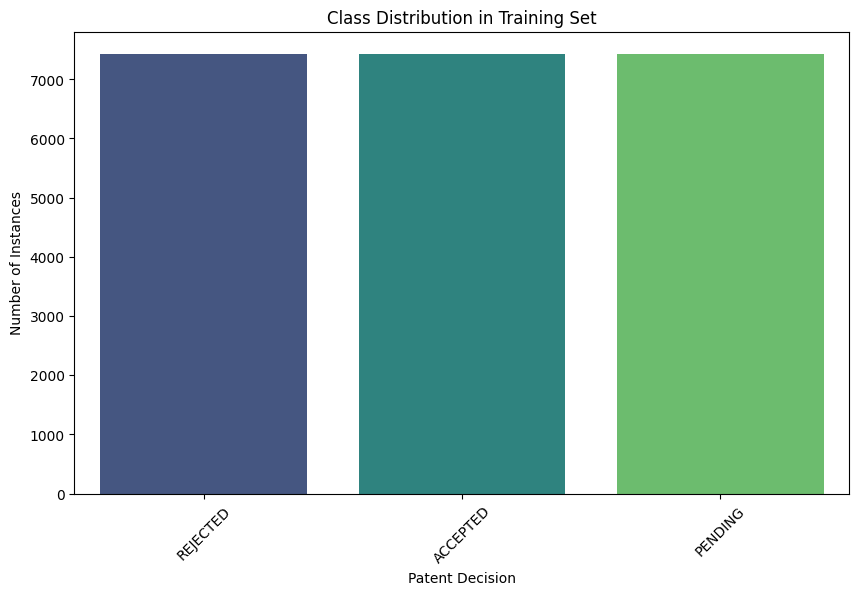

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution for training set
train_df = train_set.to_pandas()
class_counts = train_df['labels'].value_counts()

# Create a list of labels
labels = list(decision_to_str.keys())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Distribution in Training Set')
plt.xlabel('Patent Decision')
plt.ylabel('Number of Instances')

# Set tick labels
plt.xticks(ticks=class_counts.index, labels=[labels[i] for i in class_counts.index], rotation=45)
plt.show()


1. Class Distribution Pie Chart


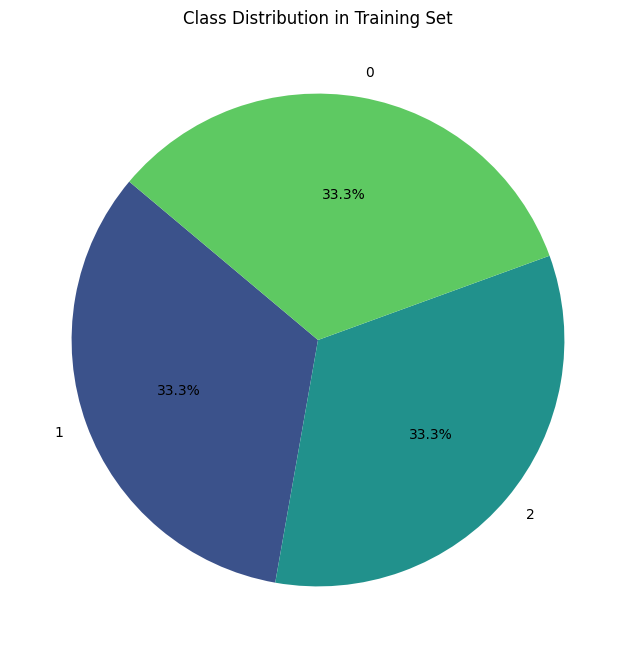

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Class Distribution in Training Set')
plt.show()


#confusion matrix

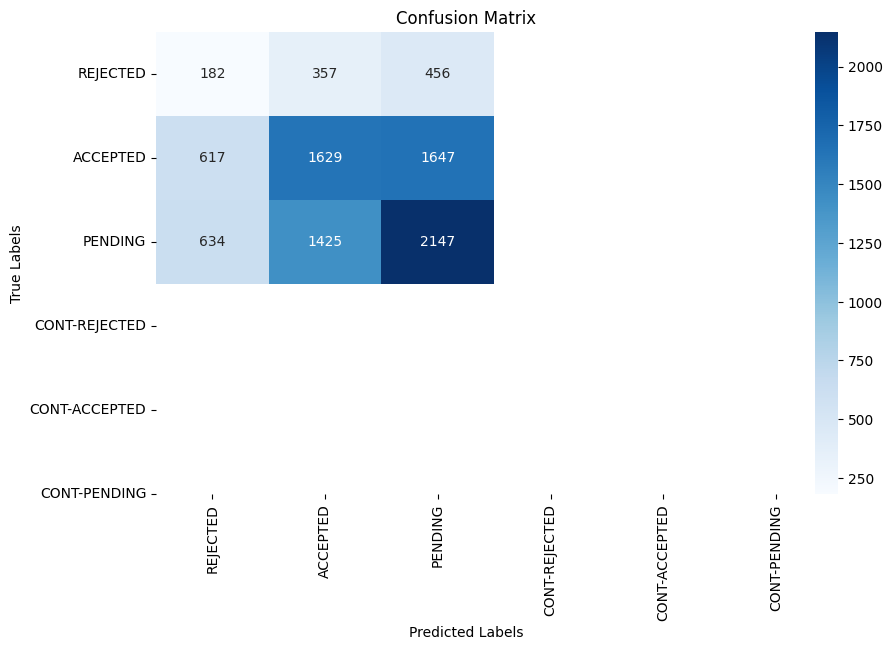

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
predictions = trainer.predict(val_set)
pred_labels = np.argmax(predictions.predictions, axis=-1)

# Confusion matrix
cm = confusion_matrix(val_set['labels'], pred_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=decision_to_str.keys(), yticklabels=decision_to_str.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
!pip install huggingface_hub
!huggingface-cli login

from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = "/content/new_model/fine_tuned_model"

# Load your model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Save the model to the Hugging Face Hub
model.push_to_hub("rb757/new_app")
tokenizer.push_to_hub("rb757/new_app")


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/rb757/new_app/commit/ea378c4e9fc60810c1fa8e2cb9dbc01a4203db06', commit_message='Upload tokenizer', commit_description='', oid='ea378c4e9fc60810c1fa8e2cb9dbc01a4203db06', pr_url=None, pr_revision=None, pr_num=None)